In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from datetime import datetime
from scipy import stats as st
import statsmodels as sm


df = pd.read_csv (r"...\Demand Forecasting Data Story Pivot.csv", low_memory=False, skipinitialspace=True)

#df.reset_index(inplace=True, drop=True)

print(df.head())
print(df.info())


   Week_Start          17          46         54        111          201  \
0  2018-07-01  164.285714  306.382979  23.971429  14.605714  1833.333333   
1  2018-07-08  400.000000  405.263158  41.581197  14.506410  2071.428571   
2  2018-07-15  127.777778  267.857143  75.186916  14.125683  2166.666667   
3  2018-07-22  157.894737  304.000000  53.584158  12.157895  2611.111111   
4  2018-07-29  191.304348  265.517241  70.456522  18.466321  3000.000000   

    424         561        566        574  ...     121302      124669  \
0   0.0  141.666667  42.403670  70.560000  ...  64.880952  145.714286   
1   0.0  300.000000  31.111111  70.000000  ...  67.647059  164.285714   
2   6.0  244.444444  39.909091  62.666667  ...  65.060241  166.666667   
3  10.0  205.263158  44.587156  62.181818  ...  60.294118  161.290323   
4   0.0  180.555556  37.019231  64.000000  ...  62.126316  150.000000   

       124670       125900      129090     129751     129752     130173  \
0   97.560976  1047.428571  2

In [6]:
#convert Week Start colum to datetime data type

df['Week_Start'] = pd.to_datetime(df['Week_Start'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 93 columns):
Week_Start    105 non-null datetime64[ns]
17            105 non-null float64
46            105 non-null float64
54            105 non-null float64
111           105 non-null float64
201           105 non-null float64
424           105 non-null float64
561           105 non-null float64
566           105 non-null float64
574           105 non-null float64
648           105 non-null float64
661           105 non-null float64
753           105 non-null float64
932           105 non-null float64
952           105 non-null float64
1001          105 non-null float64
1398          105 non-null float64
1819          105 non-null float64
3043          105 non-null float64
6873          105 non-null float64
7348          105 non-null float64
8414          105 non-null float64
9314          105 non-null float64
19956         105 non-null float64
20417         105 non-null float64
22722        

## The difference in the means of the quantities of 2 different catheters will be analyzed:

### Ho: mu1 = mu2, Ha: mu1 != mu2

In [9]:
df42859 = df['42859']
print(df42859)

df42860 = df['42860']
print('df42860 = ', df42860)

0      40.683761
1      37.072289
2      36.554348
3      40.463636
4      24.926316
         ...    
100    32.414894
101    30.248062
102    38.165217
103    36.320388
104    46.500000
Name: 42859, Length: 105, dtype: float64
df42860 =  0       78.154639
1       67.023810
2       77.571429
3       94.946809
4       59.694737
          ...    
100     61.197531
101     58.414894
102     75.372727
103     64.781609
104    118.333333
Name: 42860, Length: 105, dtype: float64


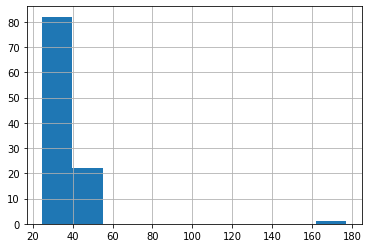

In [11]:
df42859.hist()

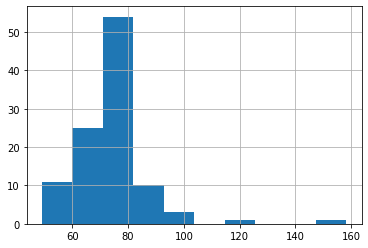

In [12]:
df42860.hist()

In [17]:
dftemp1 = df[df['42859'] < 100]
dftemp2 = df[df['42860'] < 115]

In [19]:
df42859_no_outliers = dftemp1['42859']
print('df42859 = \n', df42859)

df42860_no_outliers = dftemp2['42860']
print('df42860 = \n', df42860)

df42859 = 
     Week_Start          17          46         54        111          201  \
0   2018-07-01  164.285714  306.382979  23.971429  14.605714  1833.333333   
1   2018-07-08  400.000000  405.263158  41.581197  14.506410  2071.428571   
2   2018-07-15  127.777778  267.857143  75.186916  14.125683  2166.666667   
3   2018-07-22  157.894737  304.000000  53.584158  12.157895  2611.111111   
4   2018-07-29  191.304348  265.517241  70.456522  18.466321  3000.000000   
..         ...         ...         ...        ...        ...          ...   
100 2020-05-31  176.923077  310.869565  41.547170  13.500000  1250.000000   
101 2020-06-07  233.333333  271.111111  43.992126  21.793548  1950.000000   
102 2020-06-14  338.888889  289.795918  54.240310  12.017751  2300.000000   
103 2020-06-21  188.235294  275.555556  47.500000  14.012500  1428.571429   
104 2020-06-28  100.000000  475.000000  37.250000   9.043478  3000.000000   

      424         561        566        574  ...     121302    

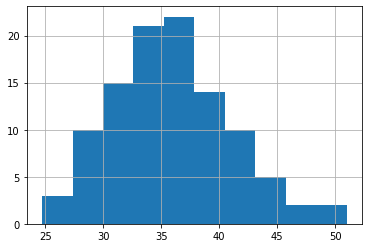

In [21]:
df42859_no_outliers.hist()

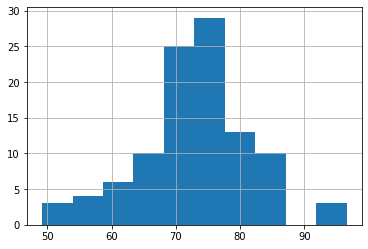

In [22]:
df42860_no_outliers.hist()

In [27]:
#Hypothesis Test

stat, p = st.ttest_ind(df42859_no_outliers, df42860_no_outliers)
print('stat = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('Fail to Reject Ho.')
else:
    print('Reject Ho. The means are not equal.')

stat = -37.572, p-value = 0.000
Reject Ho. The means are not equal.


## The difference in the means of the quantities of 2 different gowns will be analyzed:

### Ho: mu1 = mu2, Ha: mu1 != mu2

In [31]:
df753 = df['753']
df52807 = df['52807']

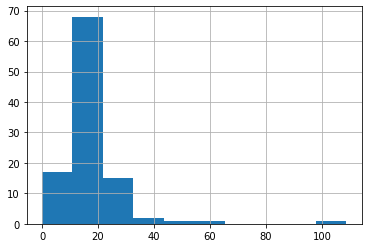

In [29]:
df753.hist()

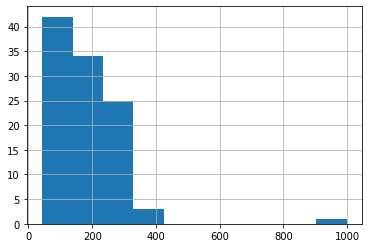

In [32]:
df52807.hist()

In [33]:
dftemp3 = df[df['753'] < 100]
dftemp4 = df[df['52807'] < 500]

In [34]:
df753_no_out = dftemp3['753']
df52807_no_out = dftemp4['52807']

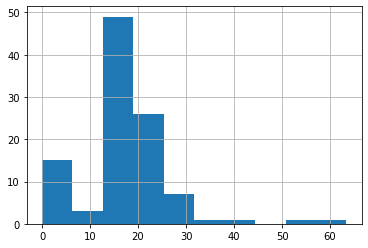

In [35]:
df753_no_out.hist()

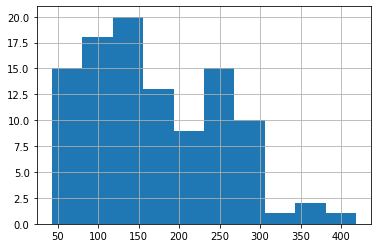

In [36]:
df52807_no_out.hist()

In [37]:
#Hypothesis Test

stat, p = st.ttest_ind(df753_no_out, df52807_no_out)
print('stat = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('Fail to Reject Ho.')
else:
    print('Reject Ho. The means are not equal.')

stat = -19.149, p-value = 0.000
Reject Ho. The means are not equal.


## The difference in the means of the quantities of 2 different hyprodermic syringes will be analyzed:

### Ho: mu1 = mu2, Ha: mu1 != mu2

In [38]:
df130173 = df['130173']
df130175 = df['130175']

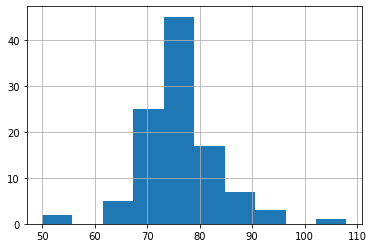

In [39]:
df130173.hist()

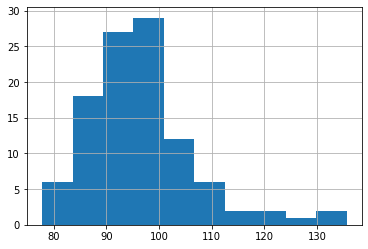

In [40]:
df130175.hist()

In [41]:
#Hypothesis Test

stat, p = st.ttest_ind(df130173, df130175)
print('stat = %.3f, p-value = %.3f' % (stat, p))
if p > 0.05:
    print('Fail to Reject Ho.')
else:
    print('Reject Ho. The means are not equal.')

stat = -16.241, p-value = 0.000
Reject Ho. The means are not equal.
